In [3]:
#Load Data
import pandas as pd
import numpy as np
import os 
#a_food, b_cloth, c_education, d_store, e_lifeservice, 
#f_cafe, g_accommodation, h_leisure, i_estaet
file_list=['a_food','b_cloth','c_education','d_store','e_lifeservice','f_cafe','g_accommodation','h_leisure','i_estate']

dir_name=os.getcwd()

x_data=[]
y_data=[]
#extract 2000 sentence data each topic
#label value : food-0, cloth-1, education-2,.... estate-8
for i in range(0,len(file_list)) :
  file_name=dir_name+'/'+file_list[i]+'.csv'
  data=pd.read_csv(file_name,header=None)
  #print(data.head())
  print(data.shape)
  #print('..'+data[0][0])
  for j in range(0,2000) :
    #print(data[0][j])
    x_data.append(data[0][j])
    y_data.append(i)

x_data=np.array(x_data)
y_data=np.array(y_data)
print(x_data.shape)
print(y_data.shape)  

(8375, 1)
(8381, 1)
(2915, 1)
(7972, 1)
(6639, 1)
(4274, 1)
(3784, 1)
(2598, 1)
(4790, 1)
(18000,)
(18000,)


In [4]:
#Pre-processing 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#Tokenize
t=Tokenizer()
t.fit_on_texts(x_data)
vocab_size=len(t.word_index)+1

print(vocab_size) #9976개의 단어가 9천개의 문장에 포함

#One-hot encoding
x_encoded=t.texts_to_sequences(x_data)
print(x_encoded[0:5])
max_len=max(len(i) for i in x_encoded) 
print(max_len) #제일 긴 문장 추출, 패딩에 사용 -- 20

#Padding
x_encoded=pad_sequences(x_encoded,maxlen=max_len,padding='post')
print(x_encoded[0:5])



16216
[[23, 498], [5830, 19, 38, 1, 41, 364, 853, 1], [3663, 415, 46, 5831, 853, 723, 18], [3663, 2076, 946, 671, 193, 1729, 127, 1459], [5832, 5833, 557, 365]]
30
[[  23  498    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [5830   19   38    1   41  364  853    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3663  415   46 5831  853  723   18    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3663 2076  946  671  193 1729  127 1459    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [5832 5833  557  365    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [5]:
#Use Pre-trained Embedding Matrix - Word2Vec https://github.com/Kyubyong/wordvectors
import gensim
import numpy as np

def get_vector(word) :
  if word in kor_word2vec_model :
    return kor_word2vec_model[word]
  else :
    return None

kor_word2vec_model = gensim.models.Word2Vec.load(dir_name+'/ko.bin')
result = kor_word2vec_model.wv.most_similar("배고픔") #model test
print(result) 
print(kor_word2vec_model) #vector_size=200

embedding_dim=200
embedding_matrix=np.zeros((vocab_size,embedding_dim))
print(np.shape(embedding_matrix))
for word, i in t.word_index.items(): 
  temp=get_vector(word)
  if temp is not None :
    embedding_matrix[i]=temp; 

print(embedding_matrix[5])
print(embedding_matrix.shape)



[('굶주림', 0.7315763235092163), ('갈증', 0.6932728290557861), ('우울증', 0.6545943021774292), ('두통', 0.6426253318786621), ('슬픔', 0.6376044154167175), ('고통', 0.6278344988822937), ('죄책감', 0.6167707443237305), ('고독', 0.6096115708351135), ('통증', 0.6073928475379944), ('가뭄', 0.5912175178527832)]
Word2Vec(vocab=30185, size=200, alpha=0.025)
(16216, 200)
[ 0.87955445  3.51403809 -3.24564695 -0.44390556  1.65877819  2.79138994
 -2.38859749 -1.69410491 -4.66581869 -1.40278232  0.52966899  2.38166356
  1.86097968 -0.2121693   1.29480684  1.340168    1.33980846  0.65593433
 -3.97182965 -1.87287378 -2.31968427 -0.36057377  1.96739149  2.63297033
  3.62644196 -2.02101588 -2.54353046 -3.30448771 -1.73401546  0.10235422
  2.16407609 -0.26688221 -1.28560567 -1.07995558 -0.43422294 -1.18709815
  2.49914885 -2.92724586  2.0472517   3.16466165 -1.0194726  -0.43097895
  0.96997708  2.60468745  0.87658358 -0.95602894  2.89103341 -0.47456264
  0.29335284 -3.18679857 -1.16479719  0.40571555 -2.49110079 -0.73088485
 

<ipython-input-5-35cf70871181>:11: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in kor_word2vec_model :
<ipython-input-5-35cf70871181>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return kor_word2vec_model[word]


In [36]:
#Split Data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#ID = 0,1,2,3,4,5  OOD = 6,7,8,
#Train = id sentence * 0.8 
#Test = id sentecne * 0.2 + OOD sentence
#for categorycal_cee label데이터 변환
categorical_y = to_categorical(y_data, 9)

id_data=[]
id_label=[]
ood_data=[]
ood_label=[]
for i in range(0,len(x_encoded)) :
    if y_data[i] < 6 :
        id_data.append(x_encoded[i])
        id_label.append(0)
    else :
        ood_data.append(x_encoded[i])
        ood_label.append(1)

#id_label=to_categorical(id_label,6)
#ood_label=to_categorical(ood_label,3)

x_train, x_test, y_train, y_test = train_test_split(id_data,id_label,
                                                    test_size=0.2,stratify=id_label,random_state=0)


for i in range(0,len(ood_data)) :
    x_test.append(ood_data[i])
    y_test.append(ood_label[i])
    
print(len(x_train),len(x_test))

x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(x_train[:3])
print(y_train[:3])

9600 8400
(9600, 30) (9600,)
(8400, 30) (8400,)
[[1931   23   11 3161 1201    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  11 8504 8505    8 4403 1383    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 507  584    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
0


In [37]:
#Load Model
from keras.models import load_model
neural_network = load_model('neural_network.h5')

In [38]:
#GPU 셋팅
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.compat.v1.Session(config=config)

config = tf.compat.v1.ConfigProto() 
config.gpu_options.per_process_gpu_memory_fraction = 0.3 
session=tf.compat.v1.Session(config=config)



In [39]:
#Sentence Embedding의 last hidden layer 가져오기
from tensorflow.keras.models import Model

sentence_embedding_layer = Model(inputs=neural_network.input, outputs=neural_network.layers[-3].output)
x_train_embedding = sentence_embedding_layer(x_train)
x_test_embedding = sentence_embedding_layer(x_test)
sentence_embedding_layer.summary()
utils.plot_model(sentence_embedding_layer)

print('======== Inputs ========')
print(x_train.shape)

print('\n======== Outputs of Hidden Layer ========')
print(x_train_embedding[:5]) #output dim 400 vectors

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 200)      3243200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 200)      3243200     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 30, 200)      0           embedding[0][0]                  
____________________________________________________________________________________________

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_51 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_52 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_53 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_54 (Dense)             (None, 400)               80400     
Total params: 361,300
Trainable params: 361,300
Non-trainable params: 0
_________________________________________________________________


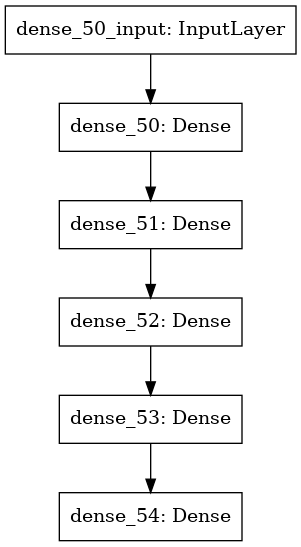

In [146]:
#Autoencoder 
from keras.layers import Input, Dense
from keras.models import Model, Sequential
import keras.utils as utils

# sentence_embedding_layer.trainable=False
# input=neural_network.input
# encoded = Dense(400, activation='tanh')(sentence_embedding_layer)
# encoded = Dense(100, activation='tanh')(encoded)

# decoded = Dense(400, activation='tanh')(decoded)


# autoencoder = Model(neural_network.input, decoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder=Sequential()
autoencoder.add(Dense(400,input_dim=400,activation='tanh'))
autoencoder.add(Dense(200,activation='tanh'))
autoencoder.add(Dense(100,activation='tanh')) 
autoencoder.add(Dense(200,activation='tanh'))
autoencoder.add(Dense(400,activation='tanh'))
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error') #reconstruction error use

autoencoder.summary()
utils.plot_model(autoencoder)

In [147]:
history=autoencoder.fit(x_train_embedding, x_train_embedding,
                epochs=500,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_embedding, x_test_embedding))


Epoch 1/500
300/300 [==============================] - 1s 2ms/step - loss: 0.1233 - val_loss: 0.0974
Epoch 2/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1220 - val_loss: 0.0962
Epoch 3/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1190 - val_loss: 0.0951
Epoch 4/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1172 - val_loss: 0.0941
Epoch 5/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.0931
Epoch 6/500
300/300 [==============================] - 1s 2ms/step - loss: 0.1145 - val_loss: 0.0922
Epoch 7/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1137 - val_loss: 0.0913
Epoch 8/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1122 - val_loss: 0.0906
Epoch 9/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1121 - val_loss: 0.0898
Epoch 10/500
300/300 [==============================] - 0s 1ms/step - loss: 0.1112 - val_lo

Epoch 161/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0671 - val_loss: 0.0603
Epoch 162/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0666 - val_loss: 0.0602
Epoch 163/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0667 - val_loss: 0.0600
Epoch 164/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0667 - val_loss: 0.0599
Epoch 165/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0668 - val_loss: 0.0598
Epoch 166/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0663 - val_loss: 0.0597
Epoch 167/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0655 - val_loss: 0.0596
Epoch 168/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0660 - val_loss: 0.0595
Epoch 169/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0662 - val_loss: 0.0594
Epoch 170/500
300/300 [==============================] - 0s 1ms/step - lo

300/300 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.0472
Epoch 320/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.0471
Epoch 321/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0465 - val_loss: 0.0471
Epoch 322/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0469 - val_loss: 0.0470
Epoch 323/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0467 - val_loss: 0.0470
Epoch 324/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0464 - val_loss: 0.0469
Epoch 325/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0463 - val_loss: 0.0469
Epoch 326/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0462 - val_loss: 0.0468
Epoch 327/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0464 - val_loss: 0.0468
Epoch 328/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0461 - v

300/300 [==============================] - 0s 1ms/step - loss: 0.0393 - val_loss: 0.0422
Epoch 478/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.0422
Epoch 479/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0389 - val_loss: 0.0422
Epoch 480/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0389 - val_loss: 0.0422
Epoch 481/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0391 - val_loss: 0.0421
Epoch 482/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0421
Epoch 483/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0386 - val_loss: 0.0421
Epoch 484/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0390 - val_loss: 0.0421
Epoch 485/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0389 - val_loss: 0.0421
Epoch 486/500
300/300 [==============================] - 0s 1ms/step - loss: 0.0387 - v

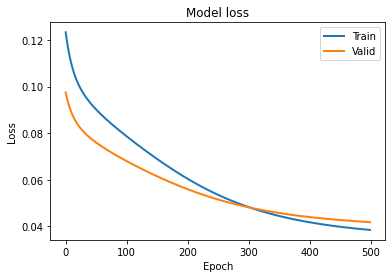

In [148]:
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [149]:
#오류 분포
predictions = autoencoder.predict(x_test_embedding)

mse = np.mean(np.power(x_test_embedding - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,8400.000000,8400.000000
mean,0.041808,0.714286
std,0.025745,0.451781
min,0.004349,0.000000
25%,0.020523,0.000000
50%,0.038874,1.000000
75%,0.059019,1.000000
max,0.176504,1.000000


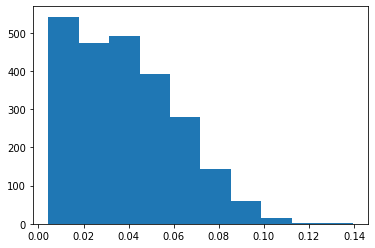

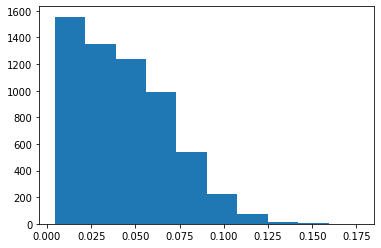

In [150]:
#ID sentence 재구성 오류 분포
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

#ID sentence 재구성 오류 분포
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 1) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

max_threshold=0
max_accuracy=0

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels,threshold):
  global max_threshold
  global max_accuracy
  acc=accuracy_score(labels,preds)
  if max_accuracy < acc :
        max_threshold=threshold
        max_accuracy=acc
        
  #print("Accuracy = {}".format(accuracy_score(labels, preds)))
  #print("Precision = {}".format(precision_score(labels, preds)))
  #print("Recall = {}".format(recall_score(labels, preds)))

preds = predict(autoencoder, x_test_embedding, threshold)
#print('threshold : ',threshold)
#print_stats(preds, y_test,threshold)


for temp in range(0, 300):
    temp=0.1+temp/1000
    preds = predict(autoencoder, x_test_embedding, temp)
    #print('threshold : ',temp)
    print_stats(preds, y_test,temp)

print('threshold : ',max_threshold)
print('max accuracy : ',max_accuracy)


threshold :  0.29900000000000004
max accuracy :  0.7142857142857143
